In [858]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")

Library


In [892]:
import os
#os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp/0_final_data/bol123_final')

#veri=pd.read_csv('final_table.csv')
veri=pd.read_csv('son_final_countsuz.csv',encoding='latin1')
veri.head()


,user_pseudo_id,mobile_brand_name,platform,category,version,country,continent,sign_up_method,is_Level7_Completed,max_event_time_diff,...,Level_Star_3_per_session,Moves_Remaining_sum_per_session,Sink_avg_session,Sink_avg_level,Source_avg_session,Source_avg_level,Source_DailyRewarded_avg_session,Source_DailyRewarded_avg_level,avg_level_per_session,Level_Star_2_per_session
0,d7c595d45f8e3ce18ad36c95ebd2f24,Lenovo,ANDROID,mobile,1.1.47,Chile,Americas,Google,1,1.570000e+12,...,23289.48718,6.064103,0.012821,0.003049,0.089744,0.021341,0.166667,0.039634,40.442857,2276.923077
1,78ef9b46ccfc09ef197a714b172375b,Samsung,ANDROID,mobile,1.1.47,India,Asia,Google,1,1.570000e+12,...,73262.16216,20.810811,0.081081,0.014493,0.027027,0.004831,NaN,NaN,68.558824,27129.729730
2,4f7b5ef8186803e80e655471f032fba,Samsung,ANDROID,tablet,1.1.48,Brazil,Americas,Google,1,1.570000e+12,...,61728.57143,11.047619,NaN,NaN,0.285714,0.033898,0.476190,0.056497,213.150000,17976.190476
3,10fae8ae0601d370dbc063ec1da137f,Samsung,ANDROID,mobile,1.1.47,Brazil,Americas,Google,1,1.570000e+12,...,126838.77550,32.204082,NaN,NaN,0.040816,0.006042,0.387755,0.057402,147.152174,49475.510204
4,4e1d03fec253798acff2af2ff3a1a4c,Samsung,ANDROID,mobile,1.1.47,Brazil,Americas,Google,1,1.570000e+12,...,27120.97902,5.958042,NaN,NaN,NaN,NaN,0.055944,0.012698,96.767677,14272.727273


In [893]:
veri["is_Level7_Completed"].value_counts()


1    13575
0     9786
Name: is_Level7_Completed, dtype: int64

In [894]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23361 entries, 0 to 23360
Data columns (total 59 columns):
user_pseudo_id                      23361 non-null object
mobile_brand_name                   22204 non-null object
platform                            23361 non-null object
category                            23361 non-null object
version                             23361 non-null object
country                             23311 non-null object
continent                           23361 non-null object
sign_up_method                      20480 non-null object
is_Level7_Completed                 23361 non-null int64
max_event_time_diff                 23361 non-null float64
min_event_time_diff                 23361 non-null float64
avg_event_time_diff                 23361 non-null float64
session_per_level                   22902 non-null float64
download_day                        23361 non-null object
monday_session_avg                  8607 non-null float64
tuesday_session_av

In [906]:
data=veri.copy()


#model datam için
# sil  max_level,session_count,countların hepsini at,session_count,
# monday_session_avgler düzelecek
data0=data.drop(["Level_Star_0_Avg","Level_Star_0_per_level","Level_Star_0_per_session","Level_PlayTime_sum"],axis=1)
data0.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23361 entries, 0 to 23360
Data columns (total 55 columns):
user_pseudo_id                      23361 non-null object
mobile_brand_name                   22204 non-null object
platform                            23361 non-null object
category                            23361 non-null object
version                             23361 non-null object
country                             23311 non-null object
continent                           23361 non-null object
sign_up_method                      20480 non-null object
is_Level7_Completed                 23361 non-null int64
max_event_time_diff                 23361 non-null float64
min_event_time_diff                 23361 non-null float64
avg_event_time_diff                 23361 non-null float64
session_per_level                   22902 non-null float64
download_day                        23361 non-null object
monday_session_avg                  8607 non-null float64
tuesday_session_av

In [907]:
data0=data0.fillna(0)



In [908]:
data0["is_Level7_Completed"].value_counts()

1    13575
0     9786
Name: is_Level7_Completed, dtype: int64

In [909]:
corr=data0.corr()
corr

,is_Level7_Completed,max_event_time_diff,min_event_time_diff,avg_event_time_diff,session_per_level,monday_session_avg,tuesday_session_avg,wednesday_session_avg,thursday_session_avg,friday_session_avg,...,Level_Star_3_per_session,Moves_Remaining_sum_per_session,Sink_avg_session,Sink_avg_level,Source_avg_session,Source_avg_level,Source_DailyRewarded_avg_session,Source_DailyRewarded_avg_level,avg_level_per_session,Level_Star_2_per_session
is_Level7_Completed,1.000000,-0.017578,-0.127841,-0.788786,0.296411,0.011987,0.049039,0.001805,0.001835,0.030140,...,0.511052,0.434988,0.093327,0.076903,0.202574,0.243726,0.298331,0.168324,0.394176,0.327752
max_event_time_diff,-0.017578,1.000000,0.011810,0.103874,-0.015050,0.039106,0.031233,0.027589,0.030950,0.021998,...,0.074338,0.087645,-0.004230,-0.014796,0.013598,0.018137,0.059856,0.041611,-0.049720,0.020452
min_event_time_diff,-0.127841,0.011810,1.000000,0.300793,-0.058052,-0.004030,-0.038614,-0.041982,-0.046327,-0.039363,...,-0.089080,-0.096938,-0.012170,-0.010208,-0.028786,-0.039487,-0.074359,-0.064144,-0.055680,-0.041913
avg_event_time_diff,-0.788786,0.103874,0.300793,1.000000,-0.245906,-0.014721,-0.057398,-0.005988,0.000532,-0.029391,...,-0.458863,-0.409029,-0.096115,-0.076637,-0.197241,-0.236208,-0.305878,-0.206119,-0.391740,-0.316215
session_per_level,0.296411,-0.015050,-0.058052,-0.245906,1.000000,0.002568,0.001160,0.003938,-0.001670,0.020338,...,0.505131,0.472587,0.107408,0.112031,0.180376,0.126050,0.277374,0.111197,0.227060,0.358641
monday_session_avg,0.011987,0.039106,-0.004030,-0.014721,0.002568,1.000000,-0.095967,-0.174991,-0.192360,-0.176725,...,0.017283,0.017579,0.000839,0.002318,0.006874,0.002280,0.001990,0.005794,-0.001303,0.011614
tuesday_session_avg,0.049039,0.031233,-0.038614,-0.057398,0.001160,-0.095967,1.000000,-0.102853,-0.157430,-0.151210,...,0.012836,0.008847,0.007188,0.004334,0.009315,0.012234,0.008374,0.013112,0.031904,0.016887
wednesday_session_avg,0.001805,0.027589,-0.041982,-0.005988,0.003938,-0.174991,-0.102853,1.000000,-0.115495,-0.147642,...,-0.001943,0.002123,-0.000439,0.005693,-0.005205,-0.002422,-0.000736,-0.005121,0.007025,-0.002566
thursday_session_avg,0.001835,0.030950,-0.046327,0.000532,-0.001670,-0.192360,-0.157430,-0.115495,1.000000,-0.099009,...,0.002190,-0.000717,-0.004634,-0.001880,0.001678,0.004336,-0.002611,-0.003149,0.003399,-0.001408
friday_session_avg,0.030140,0.021998,-0.039363,-0.029391,0.020338,-0.176725,-0.151210,-0.147642,-0.099009,1.000000,...,-0.001006,-0.003971,0.009257,0.007753,0.010963,0.013615,-0.000598,0.000542,0.024623,0.014358


In [910]:
data2=data0._get_numeric_data()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23361 entries, 0 to 23360
Data columns (total 46 columns):
is_Level7_Completed                 23361 non-null int64
max_event_time_diff                 23361 non-null float64
min_event_time_diff                 23361 non-null float64
avg_event_time_diff                 23361 non-null float64
session_per_level                   23361 non-null float64
monday_session_avg                  23361 non-null float64
tuesday_session_avg                 23361 non-null float64
wednesday_session_avg               23361 non-null float64
thursday_session_avg                23361 non-null float64
friday_session_avg                  23361 non-null float64
weekend_session_avg                 23361 non-null float64
max_session_duration                23361 non-null float64
min_session_duration                23361 non-null float64
avg_session_duration                23361 non-null float64
count_L1_move                       23361 non-null float64
count_L1

In [911]:
## RANDOM FOREST
y=data2["is_Level7_Completed"]
X=data2.drop(["is_Level7_Completed"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model



(16352, 45)
(7009, 45)
(16352,)
(7009,)


C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [912]:
y_pred=rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9888714509915822
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2972
           1       0.99      0.99      0.99      4037

    accuracy                           0.99      7009
   macro avg       0.99      0.99      0.99      7009
weighted avg       0.99      0.99      0.99      7009



In [925]:
rf_params= {"max_depth": [2,3,4,5],
           "max_features": [2,4,6],
           "n_estimators": [50,100,150],
           "min_samples_split": [100,150,200,300]}
                                 
rf_model = RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,y_train)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  8.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [926]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))



En iyi parametreler: {'max_depth': 5, 'max_features': 6, 'min_samples_split': 100, 'n_estimators': 100}


In [927]:
rf_tuned = RandomForestClassifier(max_depth = 5,
                                 max_features =6,
                                 min_samples_split=100,
                                 n_estimators=100)
rf_tuned.fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)

In [928]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9861606505920959
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2972
           1       0.99      0.98      0.99      4037

    accuracy                           0.99      7009
   macro avg       0.98      0.99      0.99      7009
weighted avg       0.99      0.99      0.99      7009



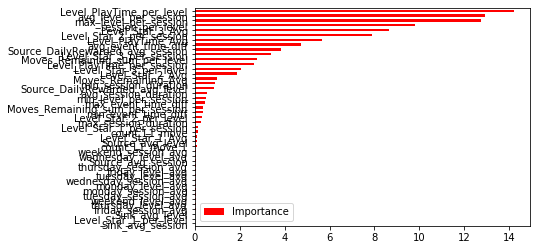

,Importance
max_event_time_diff,0.444112
min_event_time_diff,0.345117
avg_event_time_diff,4.748873
session_per_level,9.817614
monday_session_avg,0.045665
tuesday_session_avg,0.042859
wednesday_session_avg,0.049915
thursday_session_avg,0.056021
friday_session_avg,0.031625
weekend_session_avg,0.072217


In [913]:
Importance = pd.DataFrame({"Importance":rf_model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='r')
plt.show()
Importance

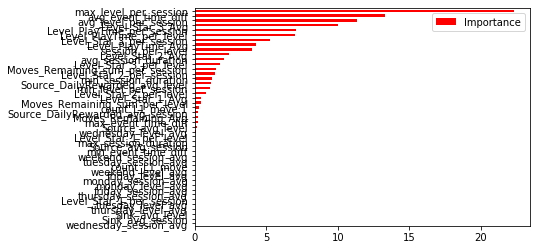

,Importance
max_event_time_diff,0.203233
min_event_time_diff,0.012050
avg_event_time_diff,13.299897
session_per_level,3.963946
monday_session_avg,0.004473
tuesday_session_avg,0.010385
wednesday_session_avg,0.000000
thursday_session_avg,0.001213
friday_session_avg,0.001430
weekend_session_avg,0.012022


In [934]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='r')
plt.show()
Importance

In [936]:
###yalnızca kategorik

import os
#os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp/0_final_data/bol123_final')

#veri=pd.read_csv('final_table.csv')
veri=pd.read_csv('countsuz_time.csv',encoding='latin1')
veri.head()

data=veri.copy()


#model datam için
# sil  max_level,session_count,countların hepsini at,session_count,
# monday_session_avgler düzelecek
data0=data.drop(["Level_Star_0_Avg","Level_Star_0_per_level","Level_Star_0_per_session","Level_PlayTime_sum"],axis=1)
data0.info()
data0=data0.fillna(0)
data2=data0._get_numeric_data()
data2.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23361 entries, 0 to 23360
Data columns (total 57 columns):
user_pseudo_id                      23361 non-null object
mobile_brand_name                   22204 non-null object
platform                            23361 non-null object
category                            23361 non-null object
version                             23361 non-null object
country                             23311 non-null object
continent                           23361 non-null object
sign_up_method                      20480 non-null object
is_Level7_Completed                 23361 non-null int64
max_event_time_diff                 23361 non-null float64
min_event_time_diff                 23361 non-null float64
avg_event_time_diff                 23361 non-null float64
session_per_level                   22902 non-null float64
download_day                        23361 non-null object
monday_session_avg                  8607 non-null float64
tuesday_session_av

In [ ]:
n_veri = data0.drop(['mobile_brand_name', 'platform','category','version','continent','country','sign_up_method','download_day','download_day_zone'],axis=1)
n_veri.head()


In [942]:
dms=pd.get_dummies(data0[['mobile_brand_name', 'platform','category','version','continent','country','sign_up_method','download_day','download_day_zone']])
dms.head()
level7= data0[["is_Level7_Completed"]]
data_c = pd.concat([level7, dms],axis = 1)
data_c.head()


,is_Level7_Completed,mobile_brand_name_0,mobile_brand_name_AIS,mobile_brand_name_ANS,mobile_brand_name_AT&T,mobile_brand_name_Acer,mobile_brand_name_Advan,mobile_brand_name_Alcatel,mobile_brand_name_Allview,mobile_brand_name_Amazon,...,download_day_Saturday,download_day_Sunday,download_day_Thursday,download_day_Tuesday,download_day_Wednesday,download_day_zone_afternoon,download_day_zone_evening,download_day_zone_morning,download_day_zone_night,download_day_zone_noon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [943]:
#yalnızca kategorik
y=data_c["is_Level7_Completed"]
X=data_c.drop(["is_Level7_Completed"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model
y_pred=rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

(16352, 438)
(7009, 438)
(16352,)
(7009,)


C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6477386217720075
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      2972
           1       0.67      0.77      0.72      4037

    accuracy                           0.65      7009
   macro avg       0.64      0.63      0.63      7009
weighted avg       0.64      0.65      0.64      7009



In [944]:
#yalnızca kategorik

rf_params= {"max_depth": [2,3,4,6],
           "max_features": [2,4,6],
           "n_estimators": [50,100,150],
           "min_samples_split": [100,150,200]}
                                 
rf_model = RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [945]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))



En iyi parametreler: {'max_depth': 6, 'max_features': 6, 'min_samples_split': 150, 'n_estimators': 50}


In [946]:
rf_tuned = RandomForestClassifier(max_depth = 6,
                                 max_features =6,
                                 min_samples_split=150,
                                 n_estimators=50)

In [947]:
rf_tuned.fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)

In [948]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6464545584248823
              precision    recall  f1-score   support

           0       0.90      0.19      0.31      2972
           1       0.62      0.98      0.76      4037

    accuracy                           0.65      7009
   macro avg       0.76      0.59      0.54      7009
weighted avg       0.74      0.65      0.57      7009



In [949]:
### Decision tree

y=data_c["is_Level7_Completed"]
X=data_c.drop(["is_Level7_Completed"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)
cart_model
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))
y_pred = cart_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))




(16352, 438)
(7009, 438)
(16352,)
(7009,)
(((((((((((((((((((((((((((((((((((0 if x[397] <= 0.5 else 0 if x[435] <= 
    0.5 else 1) if x[168] <= 0.5 else ((((0 if x[414] <= 0.5 else 0 if x[
    430] <= 0.5 else 1) if x[335] <= 0.5 else 0 if x[436] <= 0.5 else 1) if
    x[382] <= 0.5 else 0 if x[434] <= 0.5 else 1 if x[432] <= 0.5 else 0) if
    x[431] <= 0.5 else 0 if x[257] <= 0.5 else (0 if x[434] <= 0.5 else 1 if
    x[247] <= 0.5 else 0) if x[436] <= 0.5 else 1) if x[330] <= 0.5 else 0 if
    x[433] <= 0.5 else 1) if x[72] <= 0.5 else ((0 if x[397] <= 0.5 else 0 if
    x[426] <= 0.5 else 0) if x[407] <= 0.5 else 0 if x[437] <= 0.5 else 0) if
    x[388] <= 0.5 else (0 if x[430] <= 0.5 else 1 if x[235] <= 0.5 else 0) if
    x[436] <= 0.5 else 1) if x[13] <= 0.5 else 0 if x[335] <= 0.5 else 1) if
    x[412] <= 0.5 else 0 if x[436] <= 0.5 else 1) if x[387] <= 0.5 else 0 if
    x[429] <= 0.5 else ((1 if x[236] <= 0.5 else 0) if x[94] <= 0.5 else 0) if
    x[434] <= 0.5 else 1) if x[282

In [953]:
cart_grid = {"max_depth": range(1,100),
             "min_samples_split" : list(range(2,100))}
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=1)
cart_cv_model=cart_cv.fit(X_train, y_train)



Fitting 10 folds for each of 9702 candidates, totalling 97020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

KeyboardInterrupt: 

In [951]:
#En iyi parametreleri alalım
print("En iyi paramatreler: " + str(cart_cv_model.best_params_)) #en iyilerini bul


En iyi paramatreler: {'max_depth': 1, 'min_samples_split': 2}


In [952]:
cart = tree.DecisionTreeClassifier(max_depth=1, min_samples_split=2)
cart_tuned=cart.fit(X_train, y_train)
y_pred=cart_tuned.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

0.6744186046511628
              precision    recall  f1-score   support

           0       0.89      0.26      0.41      2972
           1       0.64      0.98      0.78      4037

    accuracy                           0.67      7009
   macro avg       0.77      0.62      0.59      7009
weighted avg       0.75      0.67      0.62      7009



array([[ 786, 2186],
       [  96, 3941]], dtype=int64)